In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import missingno as msno
from matplotlib import pyplot as plt
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score

In [2]:
dcare=pd.read_csv('downloads/diabetes-data.csv')

In [3]:
dcare

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1
...,...,...,...,...,...,...,...,...,...
763,10,101,76,48,180,32.9,0.171,63,0
764,2,122,70,27,0,36.8,0.340,27,0
765,5,121,72,23,112,26.2,0.245,30,0
766,1,126,60,0,0,30.1,0.349,47,1


In [4]:
dcare.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [5]:
dcare.shape

(768, 9)

In [6]:
dcare.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Pregnancies               768 non-null    int64  
 1   Glucose                   768 non-null    int64  
 2   BloodPressure             768 non-null    int64  
 3   SkinThickness             768 non-null    int64  
 4   Insulin                   768 non-null    int64  
 5   BMI                       768 non-null    float64
 6   DiabetesPedigreeFunction  768 non-null    float64
 7   Age                       768 non-null    int64  
 8   Outcome                   768 non-null    int64  
dtypes: float64(2), int64(7)
memory usage: 54.1 KB


In [7]:
dcare.describe([0.10,0.25,0.50,0.75,0.90,0.95,0.99]).T

,count,mean,std,min,10%,25%,50%,75%,90%,95%,99%,max
Pregnancies,768.0,3.845052,3.369578,0.000,0.000,1.00000,3.0000,6.00000,9.0000,10.00000,13.00000,17.00
Glucose,768.0,120.894531,31.972618,0.000,85.000,99.00000,117.0000,140.25000,167.0000,181.00000,196.00000,199.00
BloodPressure,768.0,69.105469,19.355807,0.000,54.000,62.00000,72.0000,80.00000,88.0000,90.00000,106.00000,122.00
SkinThickness,768.0,20.536458,15.952218,0.000,0.000,0.00000,23.0000,32.00000,40.0000,44.00000,51.33000,99.00
Insulin,768.0,79.799479,115.244002,0.000,0.000,0.00000,30.5000,127.25000,210.0000,293.00000,519.90000,846.00
BMI,768.0,31.992578,7.884160,0.000,23.600,27.30000,32.0000,36.60000,41.5000,44.39500,50.75900,67.10
DiabetesPedigreeFunction,768.0,0.471876,0.331329,0.078,0.165,0.24375,0.3725,0.62625,0.8786,1.13285,1.69833,2.42
Age,768.0,33.240885,11.760232,21.000,22.000,24.00000,29.0000,41.00000,51.0000,58.00000,67.00000,81.00
Outcome,768.0,0.348958,0.476951,0.000,0.000,0.00000,0.0000,1.00000,1.0000,1.00000,1.00000,1.00


In [8]:
dcare["Outcome"].value_counts()*100/len(dcare)

0    65.104167
1    34.895833
Name: Outcome, dtype: float64

In [9]:
dcare.Outcome.value_counts()

0    500
1    268
Name: Outcome, dtype: int64

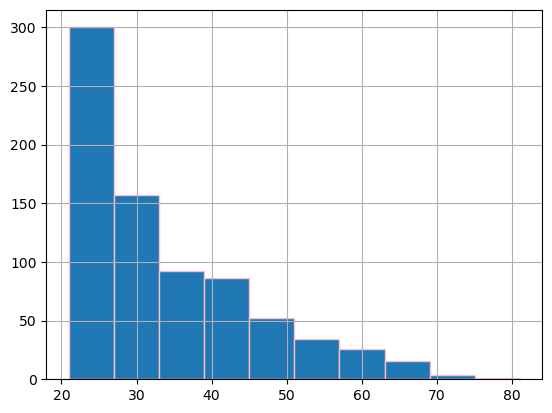

In [10]:
dcare["Age"].hist(edgecolor = "pink");

In [11]:
print("Max Age: " + str(dcare["Age"].max()) + " Min Age: " + str(dcare["Age"].min()))

Max Age: 81 Min Age: 21


C:\Users\Sony Vaio\AppData\Local\Temp\ipykernel_7468\1515245915.py:2: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(dcare.Age, bins = 20, ax=ax[0,0])
C:\Users\Sony Vaio\AppData\Local\Temp\ipykernel_7468\1515245915.py:3: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(dcare.Pregnancies, bins = 20, 

<Axes: xlabel='BMI', ylabel='Density'>

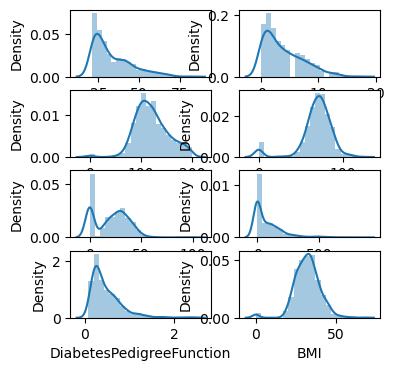

In [12]:
fig, ax = plt.subplots(4,2, figsize=(4,4))
sns.distplot(dcare.Age, bins = 20, ax=ax[0,0]) 
sns.distplot(dcare.Pregnancies, bins = 20, ax=ax[0,1]) 
sns.distplot(dcare.Glucose, bins = 20, ax=ax[1,0]) 
sns.distplot(dcare.BloodPressure, bins = 20, ax=ax[1,1]) 
sns.distplot(dcare.SkinThickness, bins = 20, ax=ax[2,0])
sns.distplot(dcare.Insulin, bins = 20, ax=ax[2,1])
sns.distplot(dcare.DiabetesPedigreeFunction, bins = 20, ax=ax[3,0]) 
sns.distplot(dcare.BMI, bins = 20, ax=ax[3,1]) 

In [13]:
dcare.groupby("Outcome").agg({"Pregnancies":"mean"})

,Pregnancies
Outcome,
0,3.298000
1,4.865672


In [14]:
dcare.groupby("Outcome").agg({"Age":"mean"})

,Age
Outcome,
0,31.190000
1,37.067164


In [15]:
dcare.groupby("Outcome").agg({"Age":"max"})

,Age
Outcome,
0,81
1,70


In [16]:
dcare.groupby("Outcome").agg({"Insulin": "mean"})

,Insulin
Outcome,
0,68.792000
1,100.335821


In [17]:
dcare.groupby("Outcome").agg({"Insulin": "max"})

,Insulin
Outcome,
0,744
1,846


In [18]:
dcare.groupby("Outcome").agg({"Glucose": "mean"})

,Glucose
Outcome,
0,109.980000
1,141.257463


In [19]:
dcare.groupby("Outcome").agg({"Glucose": "max"})

,Glucose
Outcome,
0,197
1,199


In [20]:
dcare.groupby("Outcome").agg({"BMI": "mean"})

,BMI
Outcome,
0,30.304200
1,35.142537


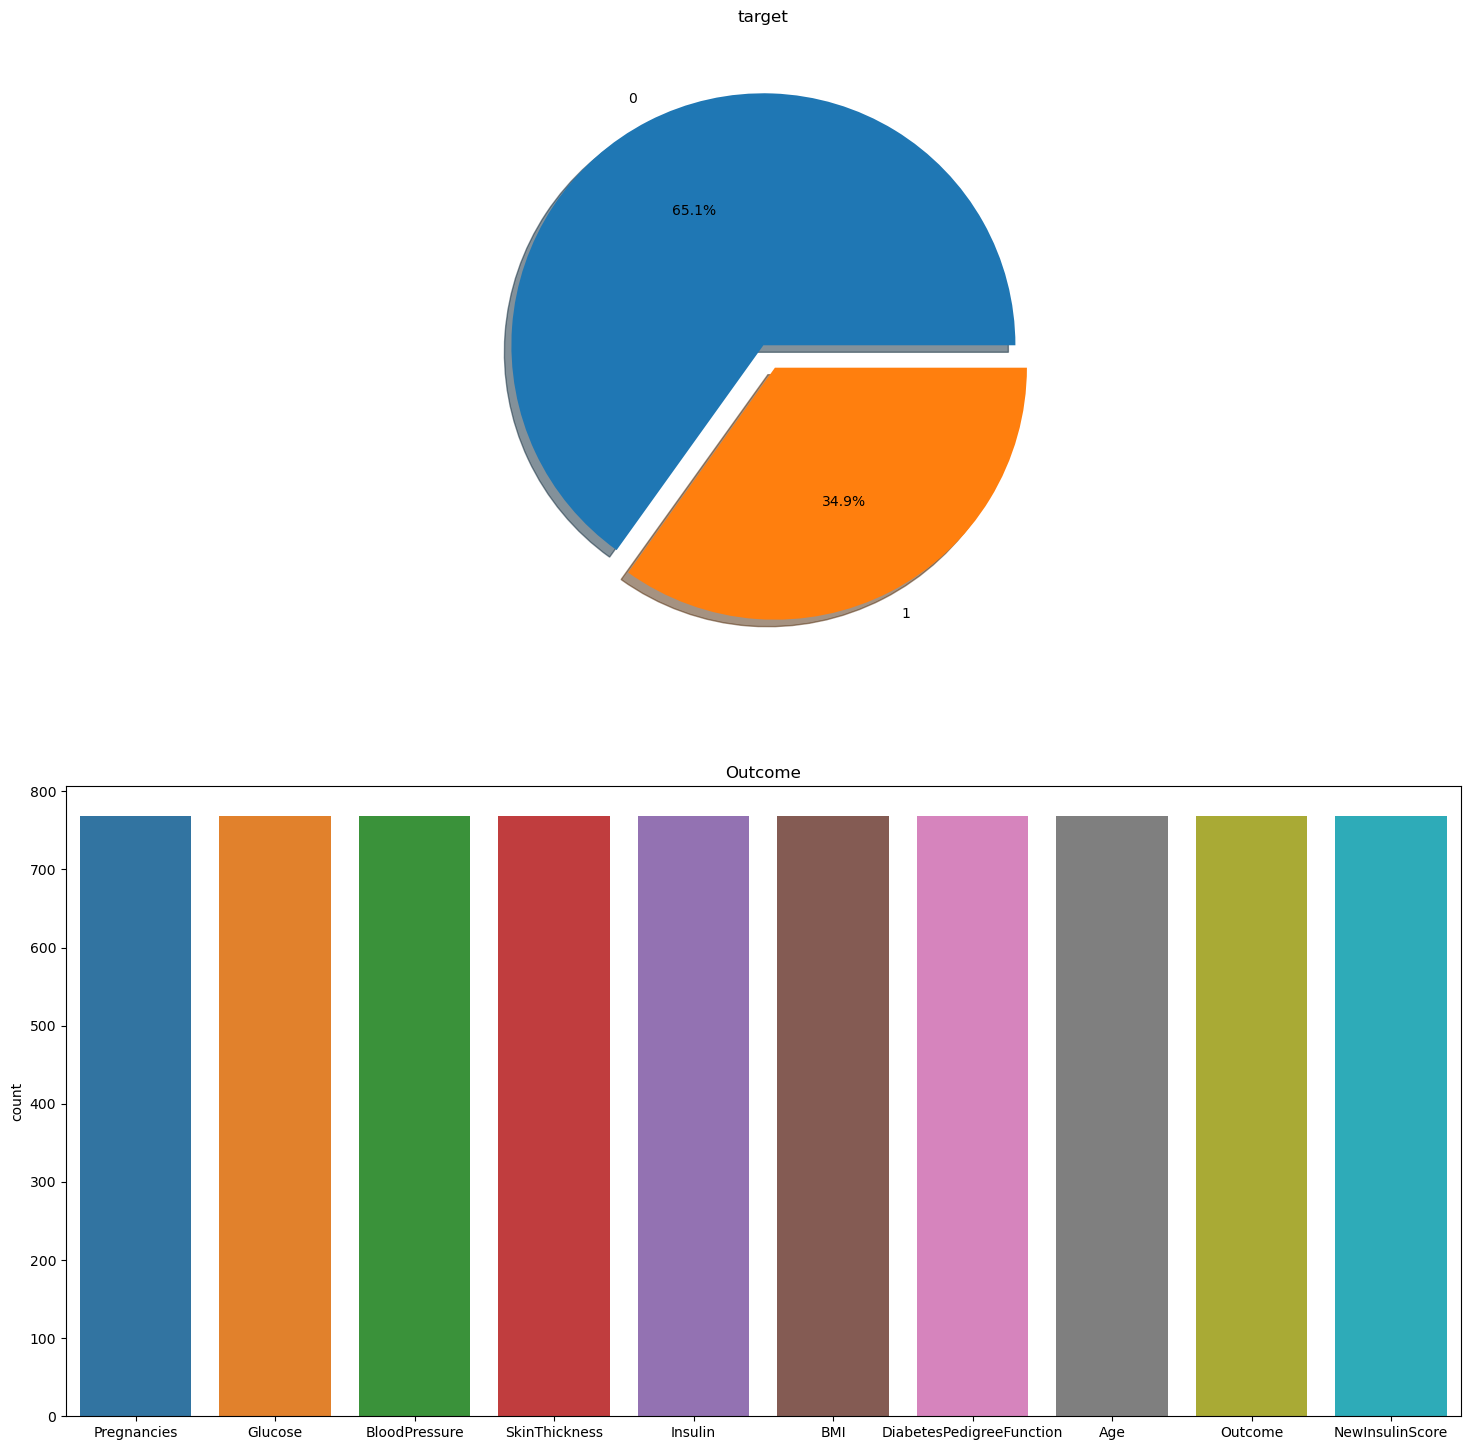

In [123]:
f,ax=plt.subplots(2,1,figsize=(18,18))
dcare['Outcome'].value_counts().plot.pie(explode=[0,0.1],autopct='%1.1f%%',ax=ax[0],shadow=True)
ax[0].set_title('target')
ax[0].set_ylabel('')
sns.countplot(data=dcare,ax=ax[1])
ax[1].set_title('Outcome')
plt.show()

In [22]:
dcare.corr()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
Pregnancies,1.000000,0.129459,0.141282,-0.081672,-0.073535,0.017683,-0.033523,0.544341,0.221898
Glucose,0.129459,1.000000,0.152590,0.057328,0.331357,0.221071,0.137337,0.263514,0.466581
BloodPressure,0.141282,0.152590,1.000000,0.207371,0.088933,0.281805,0.041265,0.239528,0.065068
SkinThickness,-0.081672,0.057328,0.207371,1.000000,0.436783,0.392573,0.183928,-0.113970,0.074752
Insulin,-0.073535,0.331357,0.088933,0.436783,1.000000,0.197859,0.185071,-0.042163,0.130548
BMI,0.017683,0.221071,0.281805,0.392573,0.197859,1.000000,0.140647,0.036242,0.292695
DiabetesPedigreeFunction,-0.033523,0.137337,0.041265,0.183928,0.185071,0.140647,1.000000,0.033561,0.173844
Age,0.544341,0.263514,0.239528,-0.113970,-0.042163,0.036242,0.033561,1.000000,0.238356
Outcome,0.221898,0.466581,0.065068,0.074752,0.130548,0.292695,0.173844,0.238356,1.000000


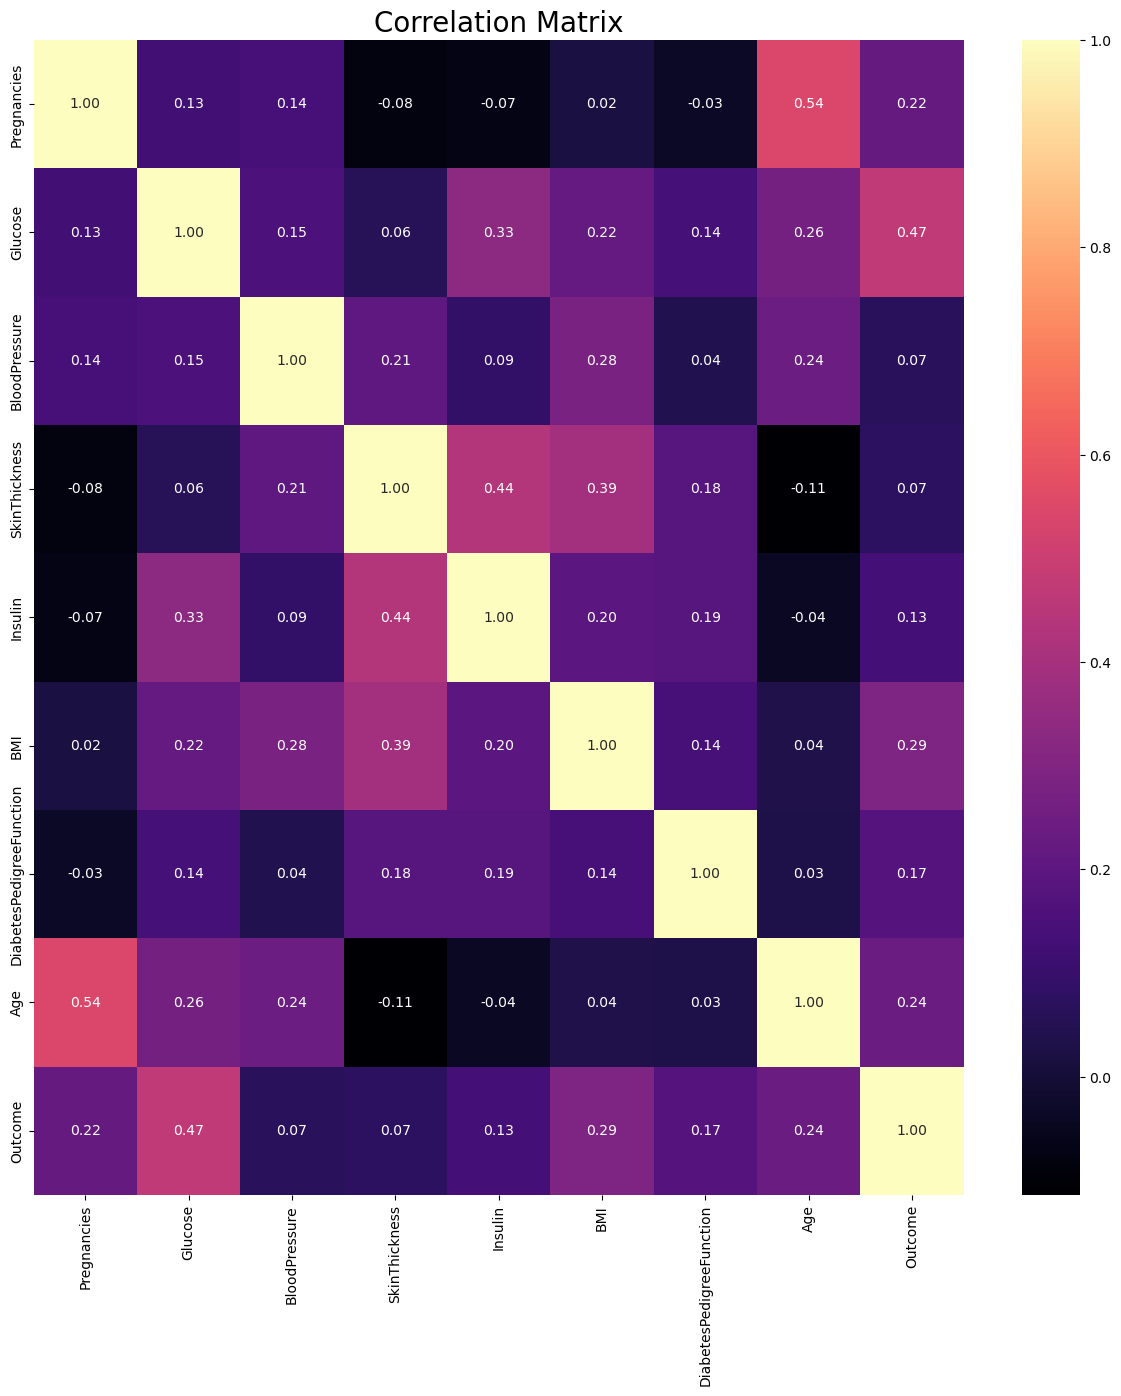

In [23]:
f, ax = plt.subplots(figsize= [15,15])
sns.heatmap(dcare.corr(), annot=True, fmt=".2f", ax=ax, cmap = "magma" )
ax.set_title("Correlation Matrix", fontsize=20)
plt.show()

In [24]:
dcare[['Glucose','BloodPressure','SkinThickness','Insulin','BMI']] = dcare[['Glucose','BloodPressure','SkinThickness','Insulin','BMI']].replace(0,np.NaN)

In [25]:
dcare.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148.0,72.0,35.0,NaN,33.6,0.627,50,1
1,1,85.0,66.0,29.0,NaN,26.6,0.351,31,0
2,8,183.0,64.0,NaN,NaN,23.3,0.672,32,1
3,1,89.0,66.0,23.0,94.0,28.1,0.167,21,0
4,0,137.0,40.0,35.0,168.0,43.1,2.288,33,1


In [26]:
dcare.isnull().sum()

Pregnancies                   0
Glucose                       5
BloodPressure                35
SkinThickness               227
Insulin                     374
BMI                          11
DiabetesPedigreeFunction      0
Age                           0
Outcome                       0
dtype: int64

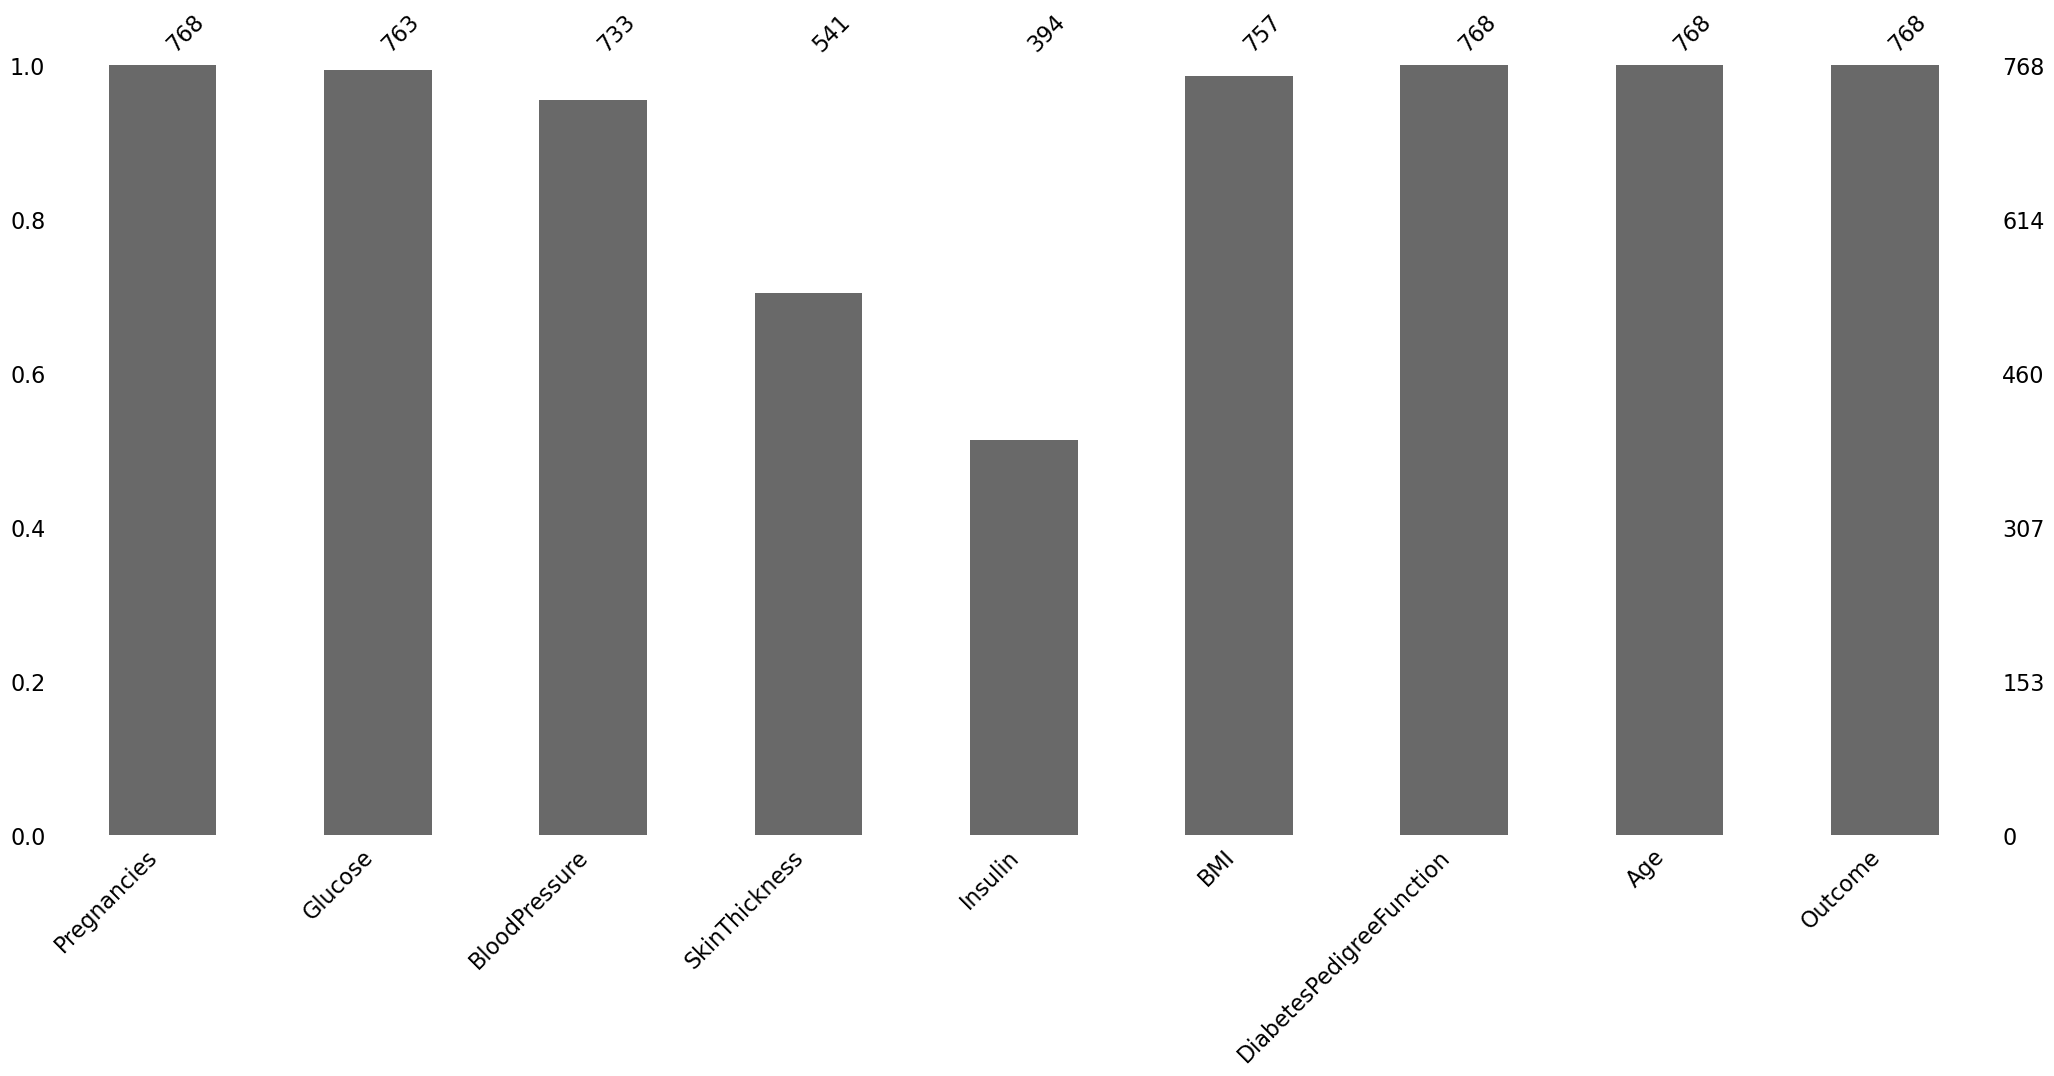

In [27]:
msno.bar(dcare);

missing value will be filled with median value

In [108]:
def median_target(var):   
    temp = df[df[var].notnull()]
    temp = temp[[var, 'Outcome']].groupby(['Outcome'])[[var]].median().reset_index()
    return temp

In [109]:
dcare.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome,NewInsulinScore
0,6,148.0,72.0,35.0,169.5,33.6,0.627,50,1,1
1,1,85.0,66.0,29.0,102.5,26.6,0.351,31,0,0
2,8,183.0,64.0,32.0,169.5,23.3,0.672,32,1,1
3,1,89.0,66.0,23.0,94.0,28.1,0.167,21,0,0
4,0,137.0,40.0,35.0,168.0,43.1,2.288,33,1,1


In [107]:
dcare.isnull().sum()

Pregnancies                 0
Glucose                     0
BloodPressure               0
SkinThickness               0
Insulin                     0
BMI                         0
DiabetesPedigreeFunction    0
Age                         0
Outcome                     0
NewInsulinScore             0
dtype: int64

outline observation 25% AND 75% QUARTER

In [32]:
for feature in dcare:
    
    Q1 = dcare[feature].quantile(0.25)
    Q3 = dcare[feature].quantile(0.75)
    IQR = Q3-Q1
    lower = Q1- 1.5*IQR
    upper = Q3 + 1.5*IQR
    
    if dcare[(dcare[feature] > upper)].any(axis=None):
        print(feature,"yes")
    else:
        print(feature, "no")

Pregnancies yes
Glucose no
BloodPressure yes
SkinThickness yes
Insulin yes
BMI yes
DiabetesPedigreeFunction yes
Age yes
Outcome no


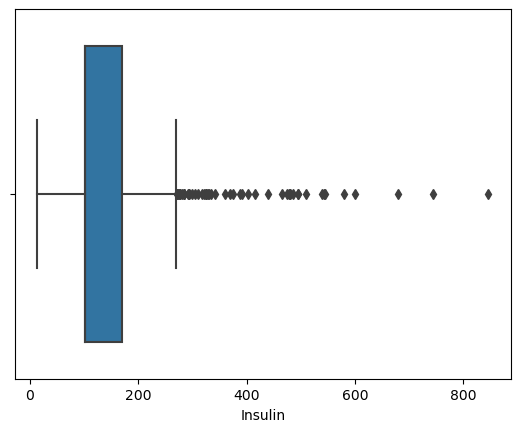

In [33]:
sns.boxplot(x = dcare["Insulin"]);

Insulin value upper or lower check

In [34]:
Q1 = dcare.Insulin.quantile(0.25)
Q3 = dcare.Insulin.quantile(0.75)
IQR = Q3-Q1
lower = Q1 - 1.5*IQR
upper = Q3 + 1.5*IQR
dcare.loc[dcare["Insulin"] > upper,"Insulin"] = upper

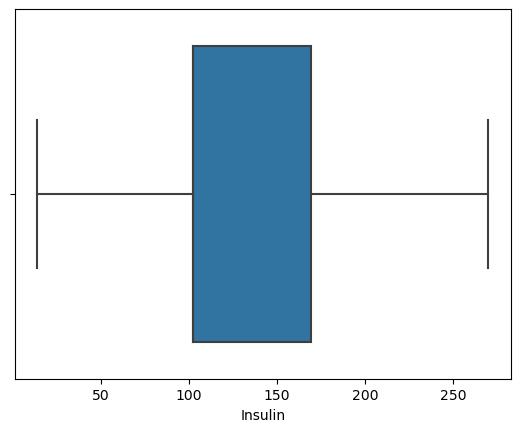

In [35]:
sns.boxplot(x = dcare["Insulin"]);

normal or abnormal insulin reassign value with o and 1

In [81]:
def set_insulin(row):
    if row["Insulin"] >= 16 and row["Insulin"] <= 166:
        return 0
    else:
        return 1

In [82]:
dcare = dcare.assign(NewInsulinScore=dcare.apply(set_insulin, axis=1))

In [83]:
dcare.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome,NewInsulinScore
0,6,148.0,72.0,35.0,169.5,33.6,0.627,50,1,1
1,1,85.0,66.0,29.0,102.5,26.6,0.351,31,0,0
2,8,183.0,64.0,32.0,169.5,23.3,0.672,32,1,1
3,1,89.0,66.0,23.0,94.0,28.1,0.167,21,0,0
4,0,137.0,40.0,35.0,168.0,43.1,2.288,33,1,1


In [84]:
dcare.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome,NewInsulinScore
0,6,148.0,72.0,35.0,169.5,33.6,0.627,50,1,1
1,1,85.0,66.0,29.0,102.5,26.6,0.351,31,0,0
2,8,183.0,64.0,32.0,169.5,23.3,0.672,32,1,1
3,1,89.0,66.0,23.0,94.0,28.1,0.167,21,0,0
4,0,137.0,40.0,35.0,168.0,43.1,2.288,33,1,1


In [85]:
dcare

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome,NewInsulinScore
0,6,148.0,72.0,35.0,169.5,33.6,0.627,50,1,1
1,1,85.0,66.0,29.0,102.5,26.6,0.351,31,0,0
2,8,183.0,64.0,32.0,169.5,23.3,0.672,32,1,1
3,1,89.0,66.0,23.0,94.0,28.1,0.167,21,0,0
4,0,137.0,40.0,35.0,168.0,43.1,2.288,33,1,1
...,...,...,...,...,...,...,...,...,...,...
763,10,101.0,76.0,48.0,180.0,32.9,0.171,63,0,1
764,2,122.0,70.0,27.0,102.5,36.8,0.340,27,0,0
765,5,121.0,72.0,23.0,112.0,26.2,0.245,30,0,0
766,1,126.0,60.0,32.0,169.5,30.1,0.349,47,1,1


In [95]:
x=dcare[['Pregnancies','Glucose','BloodPressure','SkinThickness','Insulin','BMI','DiabetesPedigreeFunction','Age','NewInsulinScore']]
y=dcare['Outcome']

In [96]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.3)

1 Logistic Regression algorithm apply

81.38528138528139


C:\Users\Sony Vaio\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


Text(50.72222222222221, 0.5, 'True label')

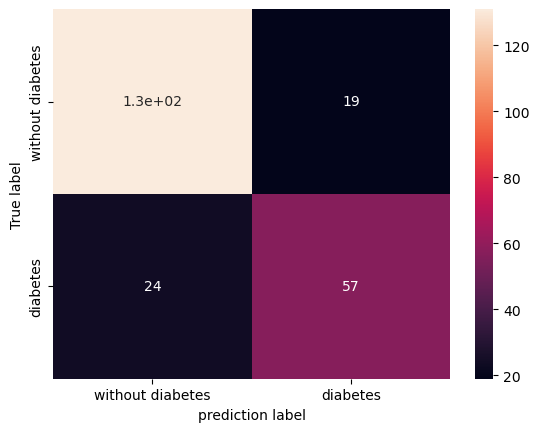

In [97]:
logis=LogisticRegression()
logis.fit(x_train,y_train)
pred=logis.predict(x_test)
mt=confusion_matrix(y_test,pred)
mt
x=mt[0][0]+mt[1][1]
y=mt[0][0]+mt[1][0]+mt[0][1]+mt[1][1]
print(x*100/y)
plt.figure()
sns.heatmap(confusion_matrix(y_test,pred),xticklabels = ['without diabetes','diabetes'],yticklabels = ['without diabetes','diabetes'],annot = True)
plt.xlabel('prediction label')
plt.ylabel('True label')

2.support vector classifier(svc) algorithm apply

83.11688311688312


Text(50.72222222222221, 0.5, 'True label')

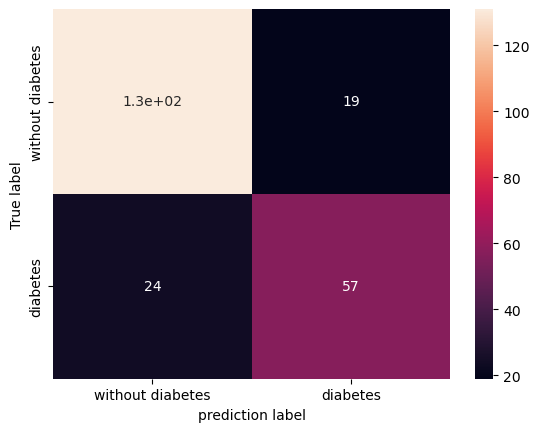

In [98]:
sv=SVC()
sv.fit(x_train,y_train)
pred2=sv.predict(x_test)
mt2=confusion_matrix(y_test,pred2)
mt2
x=mt2[0][0]+mt2[1][1]
y=mt2[0][0]+mt2[1][0]+mt2[0][1]+mt2[1][1]
print(x*100/y)
plt.figure()
sns.heatmap(confusion_matrix(y_test,pred),xticklabels = ['without diabetes','diabetes'],yticklabels = ['without diabetes','diabetes'],annot = True)
plt.xlabel('prediction label')
plt.ylabel('True label')

3 decision tree classifier algorithm apply

81.81818181818181


Text(50.72222222222221, 0.5, 'True label')

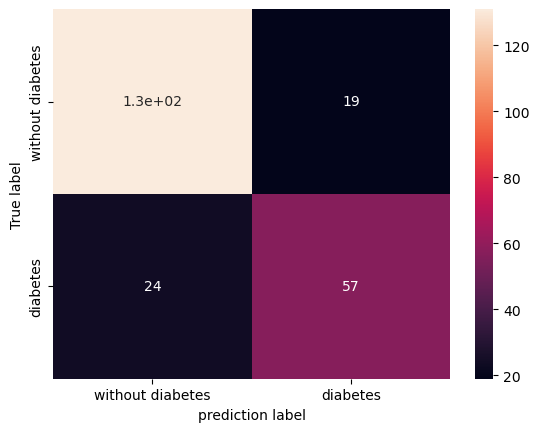

In [99]:
dtc=DecisionTreeClassifier()
dtc.fit(x_train,y_train)
pred3=dtc.predict(x_test)
mt3=confusion_matrix(y_test,pred3)
mt3
x=mt3[0][0]+mt3[1][1]
y=mt3[0][0]+mt3[1][0]+mt3[0][1]+mt3[1][1]
print(x*100/y)
plt.figure()
sns.heatmap(confusion_matrix(y_test,pred),xticklabels = ['without diabetes','diabetes'],yticklabels = ['without diabetes','diabetes'],annot = True)
plt.xlabel('prediction label')
plt.ylabel('True label')

4 Kneighbours classifier algorithm apply

86.14718614718615


Text(50.72222222222221, 0.5, 'True label')

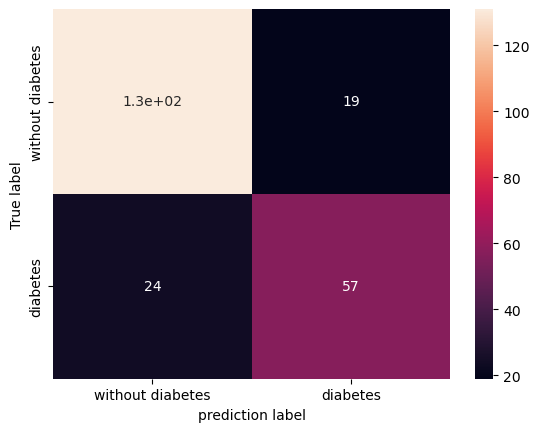

In [100]:
knn=KNeighborsClassifier()
knn.fit(x_train,y_train)
pred4=knn.predict(x_test)
mt4=confusion_matrix(y_test,pred4)
mt4
x=mt4[0][0]+mt4[1][1]
y=mt4[0][0]+mt4[1][0]+mt4[0][1]+mt4[1][1]
print(x*100/y)
plt.figure()
sns.heatmap(confusion_matrix(y_test,pred),xticklabels = ['without diabetes','diabetes'],yticklabels = ['without diabetes','diabetes'],annot = True)
plt.xlabel('prediction label')
plt.ylabel('True label')

Report:

    1.read diabetes dataset
    2.replace zero value with nan and other with corresponding values
    3.apply logistic,knn,dtree,svc algorithm for predict dataset
    4.result:The best result is there are  81.38 chance to become a diabetes